<a href="https://colab.research.google.com/github/Raghunandan1234/BERT-Sentiment_Analysis/blob/main/Roberta_Spanish_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "raghunandan234" # username from the json file
os.environ['KAGGLE_KEY'] = "6cda51226f961ca311cd2c7478f84bcb" # Provide your key from the json file
!kaggle competitions download -c dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')



done


In [ ]:
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')kaggle datasets download -d salader/dogs-vs-cats

done


In [31]:
import pandas as pd
es_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/es_train.tsv', sep='\t', header=None, usecols=[1,2])
cr_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/cr_train.tsv', sep='\t', header=None, usecols=[1,2])
mx_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/mx_train.tsv', sep='\t', header=None, usecols=[1,2])
pe_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/pe_train.tsv', sep='\t', header=None, usecols=[1,2])
uy_train = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/uy_train.tsv', sep='\t', header=None, usecols=[1,2])

# Concatenate the dataframes
train_df = pd.concat([es_train, cr_train, mx_train, pe_train, uy_train], axis=0, ignore_index=True)
# Removing neutral comments
train_df = train_df[train_df[2] != 'NEU']
# Display data
print('TRAINING DATA\n',train_df.shape)
display(train_df.head())
### VALIDATION DATA ###
# Load the different train dataframes
es_val = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/es_val.tsv', sep='\t', header=None, usecols=[1,2])
cr_val = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/cr_val.tsv', sep='\t', header=None, usecols=[1,2])
mx_val = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/mx_val.tsv', sep='\t', header=None, usecols=[1,2])
pe_val = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/pe_val.tsv', sep='\t', header=None, usecols=[1,2])
uy_val = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Vaccine-Tweets-Sentiment-Analysis/main/uy_val.tsv', sep='\t', header=None, usecols=[1,2])
# Concatenate the dataframes
val_df = pd.concat([es_val, cr_val, mx_val, pe_val, uy_val], axis=0, ignore_index=True)
# Removing neutral comments
val_df = val_df[val_df[2] != 'NEU']
# Display data
print('VALIDATION DATA\n',val_df.shape)
display(val_df.head())


TRAINING DATA
 (3279, 2)


,1,2
0,@morbosaborealis jajajaja... eso es verdad... ...,N
3,"Mi última partida jugada, con Sona support. La...",P
4,Tranquilos que con el.dinero de Camacho seguro...,P
5,"@daniacal aún no, pero si estará jugable en el...",P
6,@ragnomuelle Yo a veces hecho de menos mi pelo...,N


VALIDATION DATA
 (1650, 2)


,1,2
0,@chefidiaz no seas muy dura,N
2,Como destrozaba el puto movil ahora mismo,N
4,@omixam no creo que hayan diseñado una tipo pr...,N
5,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,N
6,"@Hanita_chan nfin, no puede ser peor que un mi...",N


In [32]:
train_df.dropna(axis=0,inplace=True)


In [40]:
val_df.dropna(axis=0,inplace=True)

In [41]:
train_texts = list(train_df[1])
train_labels = list(train_df[2])
## Val data|
val_texts = list(val_df[1])
val_labels = list(val_df[2])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split( train_texts,train_labels, test_size=0.15, random_state=42)

In [43]:
y_train

['N',
 'N',
 'N',
 'P',
 'N',
 'P',
 'N',
 'P',
 'P',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'N',
 'P',
 'N',
 'P',
 'N',
 'N',
 'P',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'P',
 'P',
 'N',
 'P',
 'N',
 'N',
 'P',
 'N',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'P',
 'N',
 'P',
 'P',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'P',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'N',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'P',
 'P',
 'P',
 'N',
 'P',
 'N',
 'P',
 'P',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'P',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'P',
 'P',
 'P',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'P',
 'P',
 'P',
 'P',
 'P',
 'P',
 'P',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'P',
 'N',
 'N',
 'N',
 'P',
 'P',
 'N',
 'N',
 'N',
 'P',
 'N',
 'N',
 'N'

In [44]:
!pip install transformers

In [45]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("BSC-TeMU/roberta-base-bne")
# Preprocessing text
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)


val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [46]:
import tensorflow as tf
d = {'N':0, 'P':1}
## Map the values in the dictionary to the three lists of labels
train_labels = list(pd.Series(y_train).map(d).astype(int))
test_labels = list(pd.Series(y_test).map(d).astype(int))
val_labels = list(pd.Series(val_labels).map(d).astype(int))
# Create the tensorflow datasets from our encodings
train_dataset = tf.data.Dataset.from_tensor_slices((
dict(train_encodings),train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((
dict(test_encodings),test_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((
dict(val_encodings),val_labels))

In [47]:
from transformers import TFAutoModelForSequenceClassification
## Model Definition
roberta_model = TFAutoModelForSequenceClassification.from_pretrained("BSC-TeMU/roberta-base-bne", from_pt=True, num_labels=2)
## Model Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.metrics.SparseCategoricalAccuracy()
roberta_model.compile(optimizer=optimizer, loss=loss, metrics=metric)
## Fitting the data
#history = roberta_model.fit(train_dataset, validation_data=val_dataset, epochs=5, batch_size=64)
history = roberta_model.fit(train_dataset.shuffle(len(train_labels)).batch(64), validation_data=val_dataset.shuffle(len(val_labels)).batch(64), epochs=3, batch_size=64)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/3
44/44 [==============================] - 94s 897ms/step - loss: 0.4489 - sparse_categorical_accuracy: 0.7894 - val_loss: 0.3280 - val_sparse_categorical_accuracy: 0.8745
Epoch 2/3
44/44 [==============================] - 37s 852ms/step - loss: 0.1794 - sparse_categorical_accuracy: 0.9379 - val_loss: 0.3544 - val_sparse_categorical_accuracy: 0.8618
Epoch 3/3
44/44 [==============================] - 38s 866ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.3888 - val_sparse_categorical_accuracy: 0.8533


In [49]:
# Calculate the mean val_sparse_categorical_accuracy
import numpy as np
print('The mean Sparse Categorical Acc for the val_set is: ', np.mean(history.history['val_sparse_categorical_accuracy']))
# And save the model
roberta_model.save_pretrained('Twitter_Roberta_Model')

The mean Sparse Categorical Acc for the val_set is:  0.8632323344548544


In [54]:
from transformers import pipeline
roberta_classifier = pipeline('sentiment-analysis', model=roberta_model, tokenizer=tokenizer)
# Let's see if it works on an example
y=roberta_classifier(X_test)

In [55]:
y

[{'label': 'LABEL_0', 'score': 0.9937928915023804},
 {'label': 'LABEL_0', 'score': 0.9194926619529724},
 {'label': 'LABEL_0', 'score': 0.9325079321861267},
 {'label': 'LABEL_0', 'score': 0.8121631145477295},
 {'label': 'LABEL_0', 'score': 0.995980978012085},
 {'label': 'LABEL_0', 'score': 0.9892472624778748},
 {'label': 'LABEL_1', 'score': 0.9800068736076355},
 {'label': 'LABEL_1', 'score': 0.7214457988739014},
 {'label': 'LABEL_0', 'score': 0.9911313652992249},
 {'label': 'LABEL_0', 'score': 0.5166693329811096},
 {'label': 'LABEL_0', 'score': 0.8855921626091003},
 {'label': 'LABEL_0', 'score': 0.9962741136550903},
 {'label': 'LABEL_0', 'score': 0.9811779260635376},
 {'label': 'LABEL_1', 'score': 0.5215755105018616},
 {'label': 'LABEL_0', 'score': 0.9872105121612549},
 {'label': 'LABEL_1', 'score': 0.7464250326156616},
 {'label': 'LABEL_0', 'score': 0.9873173832893372},
 {'label': 'LABEL_0', 'score': 0.9742902517318726},
 {'label': 'LABEL_1', 'score': 0.97371506690979},
 {'label': 'LAB

In [56]:
f=[]
for i in range(len(y)):
  f.append(y[i]['label'])

In [57]:
f

['LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_1',
 'LABEL_0',
 'LABEL_0',
 'LA

In [69]:
d = {'LABEL_0':0, 'LABEL_1':1}
## Map the values in the dictionary to the three lists of labels
test = list(pd.Series(f).map(d).astype(int))


In [72]:
d = {'N':0, 'P':1}
## Map the values in the dictionary to the three lists of labels
act = list(pd.Series(y_test).map(d).astype(int))

In [63]:
test

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1'

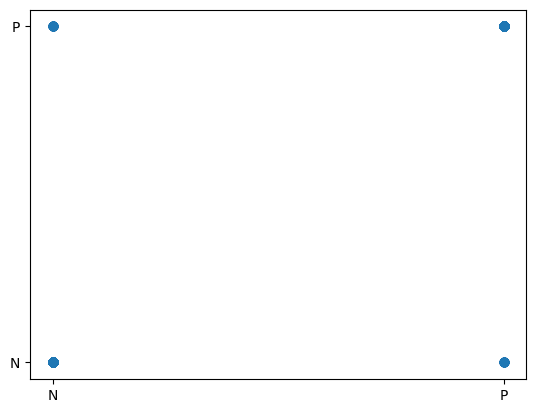

In [61]:
import matplotlib.pyplot as plt
plt.scatter(test,y_test)

In [82]:
import numpy as np
np.mean((act-test))

0.026422764227642278

In [66]:
test=np.array(test)

In [74]:
act=np.array(act)

In [75]:
act.shape

(492,)

In [77]:
act-test


array([ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1, -1,  0,  0,  0,  1,  0,  0, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1, -1,  0